In [1]:
import gym # para elegir el ambiente en el cual entrenaremos el agente.
import sys

import pandas as pd # para disponer de la data de forma mas organizada.
import matplotlib.pyplot as plt # para mostrar gráficos.
import numpy as np #para el procesamiento de números.

np.random.seed(666)

%matplotlib inline

from collections import defaultdict #utilizaremos un defaultdict como base
# en la cual guardaremos el valor que tendrá cada una de nuestras acciones. 

def e_greedy(Q, epsilon, nA, observation):
    '''Retorna la mejor acción dada la politica Q, esto 
    siempre con la probabilidad epsilon de elegir una acción
    al azar'''
    A = np.ones(nA) * epsilon / nA
    best_action = np.argmax(Q[observation])
    A[best_action] += (1.0 - epsilon)
    return A

In [2]:
env = gym.make('FrozenLake-v0') #este es el ambiente que utilizaremos,
# puedes buscar como funciona en la documentación.

In [3]:
Q = defaultdict(lambda: np.zeros(env.action_space.n)) #se define nuestra base como un diccionario anidado con cada acción 
#que podría tomar el agente.


decay = 0.0000042
decay = 1 - decay #este valor será por el cual decaerá nuestro epsilon en cada episodio. 
alpha = 0.0001 #nuestro valor de "media movil" se verá afectado por esta variable. 

numero_de_acciones = env.action_space.n
episode = 0
obs = 0
counter_state_actions = set() #esta variable almacenará cada que accion se realice por cada episodio.
total_reward = 0
eps = epsilon = 1 # valor de epsilon inicial
env.reset() #inicia el ambiente
sa_to_end = list() #contador de acciones que se realizaron hasta el final del episodio.
eps_list = list() #variable que almacenará los valores de epsilon.
reward_list = [] #variable que almacenará los valores de recompensa.

In [4]:
for numb_iter in range(1, 1200001):
    episode += 1
    while True:   
        actions_prob = e_greedy(Q, epsilon, numero_de_acciones, obs) #variable que almacenará la probabilidad de realizar cada acción. 
        selected_action = np.argmax(np.random.multinomial(1, actions_prob)) #se elige la acción.
        obs, temporal_reward, final, _ = env.step(selected_action)
        counter_state_actions.add((obs, selected_action))
        total_reward += temporal_reward
        if final:
            if episode % 100000 == 0:
                print(f'Número de Episodios Realizados: {episode}')
            obs = 0            
            for ob, ac in counter_state_actions:
                Q[ob][ac] += alpha* (total_reward - Q[ob][ac]) #se actualiza el valor de cada acción en cada estado.
            sa_to_end.append(len(counter_state_actions))
            eps_list.append(epsilon)
            epsilon= eps*decay**episode
            env.reset()
            reward_list.append(total_reward)
            total_reward = 0
            counter_state_actions = set()
            break

Número de Episodios Realizados: 100000
Número de Episodios Realizados: 200000
Número de Episodios Realizados: 300000
Número de Episodios Realizados: 400000
Número de Episodios Realizados: 500000
Número de Episodios Realizados: 600000
Número de Episodios Realizados: 700000
Número de Episodios Realizados: 800000
Número de Episodios Realizados: 900000
Número de Episodios Realizados: 1000000
Número de Episodios Realizados: 1100000
Número de Episodios Realizados: 1200000


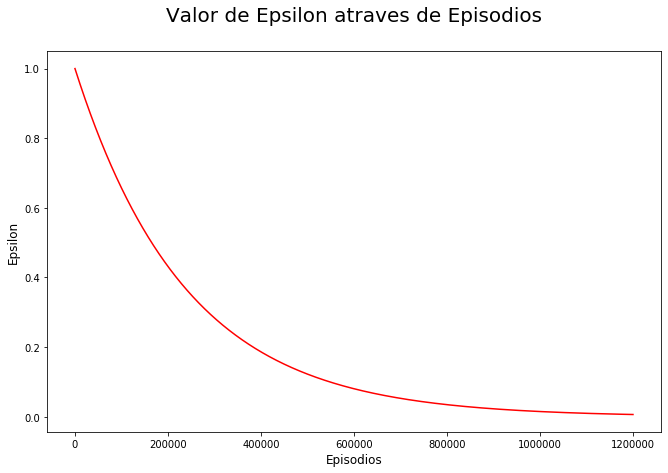

In [5]:
plt.figure(figsize=(11,7)) 
plt.title('Valor de Epsilon atraves de Episodios', fontsize=20, pad=30)
plt.xlabel('Episodios', fontsize=12)
plt.ylabel('Epsilon', fontsize=12)

plt.plot(eps_list, color='r')

In [6]:
df = pd.DataFrame({'Number_of_States': sa_to_end, 
            'Reward': reward_list})

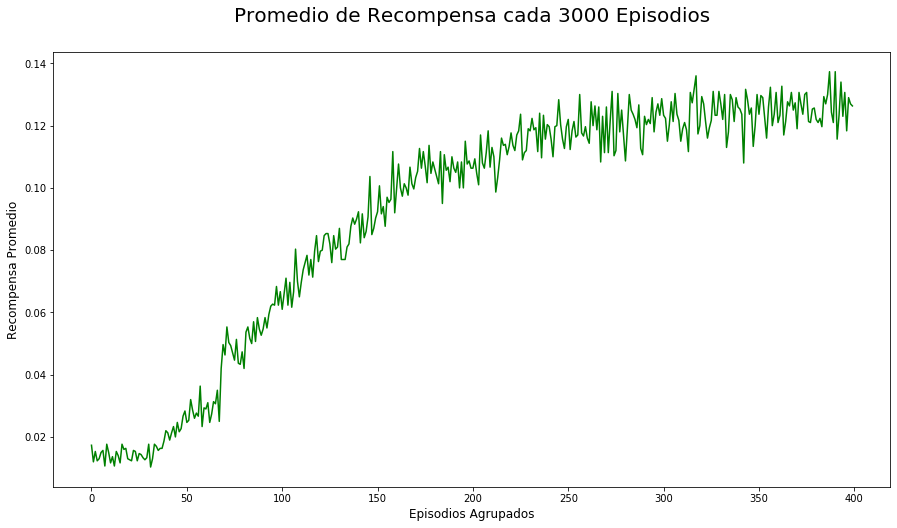

In [7]:
plt.figure(figsize=(15,8)) 
plt.title('Promedio de Recompensa cada 3000 Episodios', fontsize=20, pad=30)
plt.xlabel('Episodios Agrupados', fontsize=12)
plt.ylabel('Recompensa Promedio', fontsize=12)
plt.plot(df.groupby(df.index //3000)['Reward'].mean(), color='g')

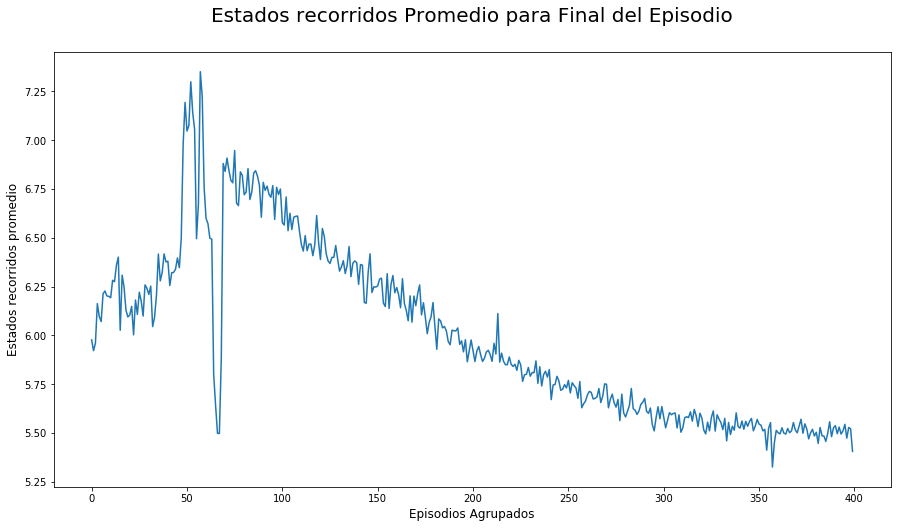

In [8]:
plt.figure(figsize=(15,8)) 
plt.title('Estados recorridos Promedio para Final del Episodio', fontsize=20, pad=30)
plt.xlabel('Episodios Agrupados', fontsize=12)
plt.ylabel('Estados recorridos promedio', fontsize=12)
plt.plot(df.groupby(df.index //3000)['Number_of_States'].mean())